## ЛР №2 EDA, Вариант - Exams

Импорт библиотек

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import colors as mcolors

# 1/2 - Импорт датасета, описание и постановка задачи

In [56]:
ds_name = '/content/exams.csv'

data = pd.read_csv(ds_name, sep=',')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Исходя из представленых колонок, можно сделать вывод о том, что названием датасета является - Успеваемость студентов на различных экзаменах. Основанием такого предположения является наличие таких колонок, как **math score	reading score	writing score**. Каждую из трех переменных можно выделить, как целевую. Лично я бы предпочел выбрать **math_score** за **y** - целевую переменную.
В качестве предикторов для целевой переменной можно выбрать все оставшиеся в датасете переменные.

# 3. Построение распределение целевой переменной

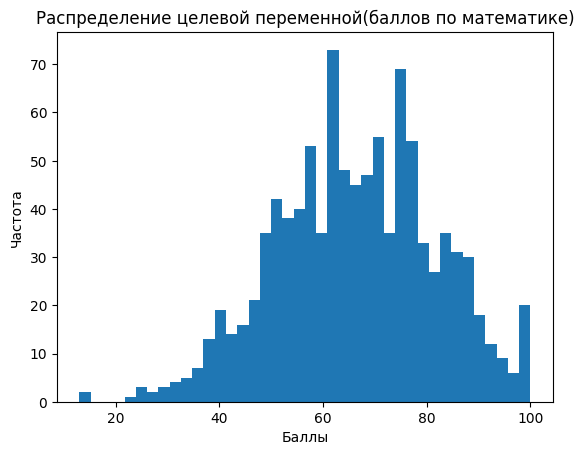

In [4]:
plt.hist(data['math score'], bins = 40)
plt.title('Распределение целевой переменной(баллов по математике)')
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.show()

При первом взгляде на график можно заметить, что целевая переменная почти поддается нормальному распределению.

Оценим количество уникальных значений целевой переменной

In [5]:
def unique_value(input_list):
    some_dict = {}
    for elem in input_list:
        if elem in some_dict:
            some_dict[elem] += 1
        else:
            some_dict[elem] = 1
    unique_scores = [key for key, value in some_dict.items() if value == 1]
    return unique_scores

In [6]:
math_score_series = data['math score']
math_score_lsit = math_score_series.to_list()
list_of_unique_values = unique_value(math_score_lsit)

print("Количество уникальных значений целевой переменной(баллов по математике) ", len(list_of_unique_values))
print("Список уникальных значений целевой переменной(баллов по математике) ", list_of_unique_values)

Количество уникальных значений целевой переменной(баллов по математике)  4
Список уникальных значений целевой переменной(баллов по математике)  [23, 29, 34, 25]


# 4. Выведем основные статистики по переменным

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


# 5. Выведем основную информацию по датасету

In [8]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 6. Посчитаем количество пропусков во всех колонках

In [14]:
missing_values = data.isnull().sum()
missing_values1 = data.isna().sum()
print("Количество пропусков в каждой колонке: ")
print(missing_values, "\n")
print("#######################################", "\n")
print(missing_values1)

Количество пропусков в каждой колонке: 
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64 

####################################### 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [80]:
data.applymap(lambda x: x is None)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


# 7. Построим 5 выборочных гистограмм

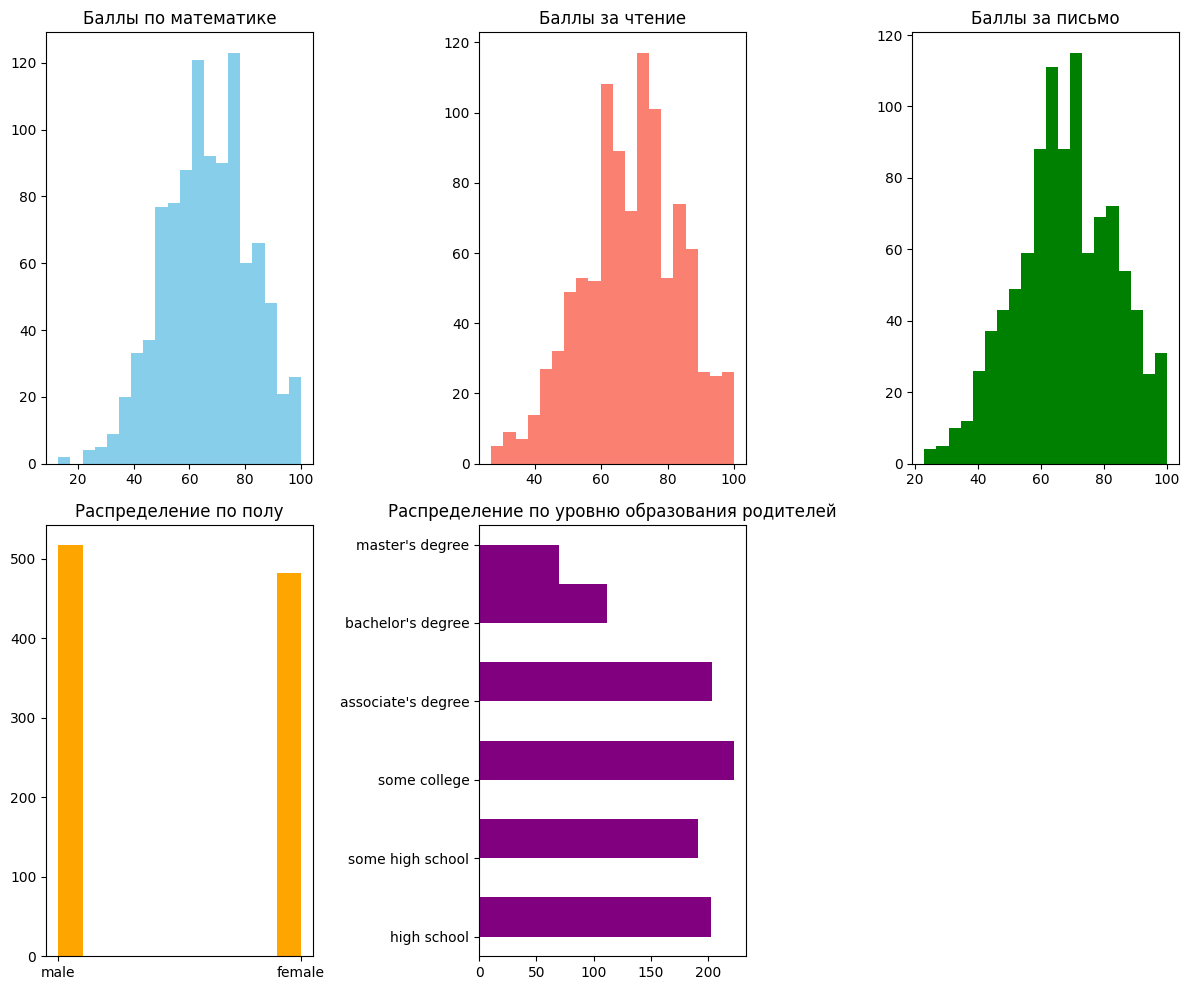

In [50]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.hist(data['math score'], bins=20, color='skyblue')
plt.title('Баллы по математике')

plt.subplot(2, 3, 2)
plt.hist(data['reading score'], bins=20, color='salmon')
plt.title('Баллы за чтение')

plt.subplot(2, 3, 3)
plt.hist(data['writing score'], bins=20, color='green')
plt.title('Баллы за письмо')

plt.subplot(2, 3, 4)
plt.hist(data['gender'], color='orange')
plt.title('Распределение по полу')

plt.subplot(2, 3, 5)
plt.hist(data['parental level of education'], color='purple', orientation='horizontal')
plt.title('Распределение по уровню образования родителей')

plt.tight_layout()
plt.show()

# 8. Построим графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной

<ipython-input-94-dc291598bcfc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'gender', y = 'math score', data=data, palette=my_pal)
<ipython-input-94-dc291598bcfc>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'race/ethnicity', y = 'math score', data = data, palette=new_pal)
<ipython-input-94-dc291598bcfc>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'parental level of education', y = 'math score', data = data, palette=newest_pal)


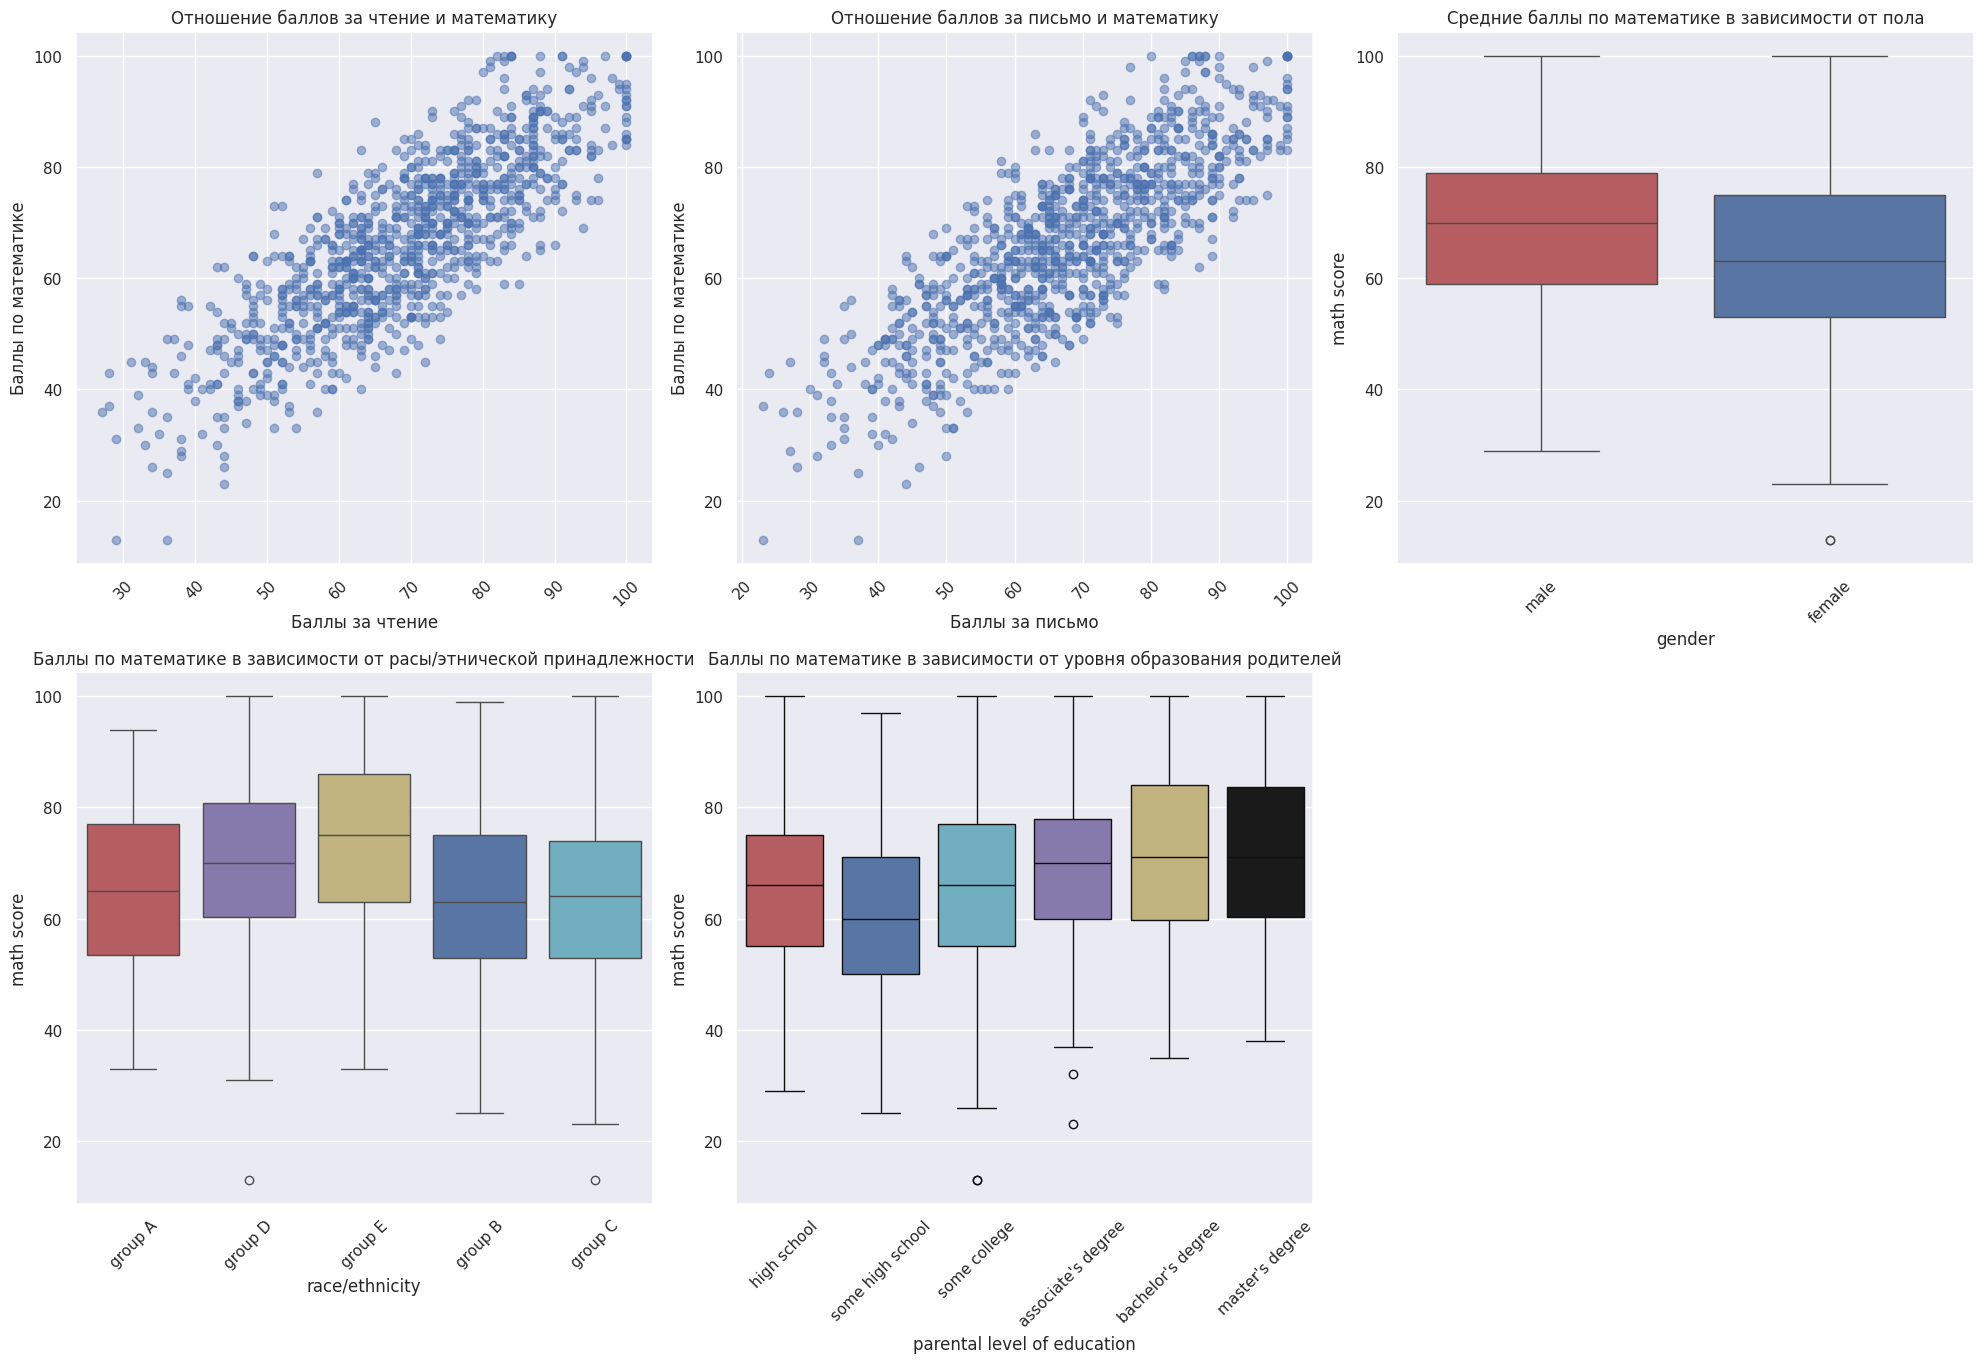

In [94]:
plt.figure(figsize=(20, 15))

sns.set_theme(style="darkgrid")
ax1 = plt.subplot(2, 3, 1)
plt.scatter(data['reading score'],data['math score'], alpha=0.5)
plt.title('Отношение баллов за чтение и математику')
plt.xlabel('Баллы за чтение')
plt.ylabel('Баллы по математике')

ax2 = plt.subplot(2, 3, 2)
plt.scatter(data['writing score'], data['math score'], alpha=0.5)
plt.title('Отношение баллов за письмо и математику')
plt.xlabel('Баллы за письмо')
plt.ylabel('Баллы по математике')

ax3 = plt.subplot(2, 3, 3)
my_pal = {"male": "r", "female": "b"}
sns.boxplot(x = 'gender', y = 'math score', data=data, palette=my_pal)
plt.title('Средние баллы по математике в зависимости от пола')

ax4 = plt.subplot(2, 3, 4)
new_pal = {"group A": "r", "group B": "b", "group C": "c", "group D":"m", "group E":"y"}
sns.boxplot(x = 'race/ethnicity', y = 'math score', data = data, palette=new_pal)
plt.title('Баллы по математике в зависимости от расы/этнической принадлежности')

ax5 = plt.subplot(2, 3, 5)
newest_pal = {"high school": "r", "some high school": "b", "some college": "c", "associate's degree":"m", "bachelor's degree":"y", "master's degree":"k"}

sns.boxplot(x = 'parental level of education', y = 'math score', data = data, palette=newest_pal)
plt.title('Баллы по математике в зависимости от уровня образования родителей')

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

9. # EXTRA

я просто попытаюсь привести все качественные данные к числовому типу, почекать хитмапу и подумать че ваще как

In [57]:
df = data.copy()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [58]:
from sklearn.preprocessing import LabelEncoder

df = data.copy()

label_encoder_gender = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_parental_level = LabelEncoder()
label_encoder_lunch = LabelEncoder()
label_encoder_test_prep = LabelEncoder()

df['gender'] = label_encoder_gender.fit_transform(df['gender'])
df['race/ethnicity'] = label_encoder_race.fit_transform(df['race/ethnicity'])
df['parental level of education'] = label_encoder_parental_level.fit_transform(df['parental level of education'])
df['lunch'] = label_encoder_lunch.fit_transform(df['lunch'])
df['test preparation course'] = label_encoder_test_prep.fit_transform(df['test preparation course'])

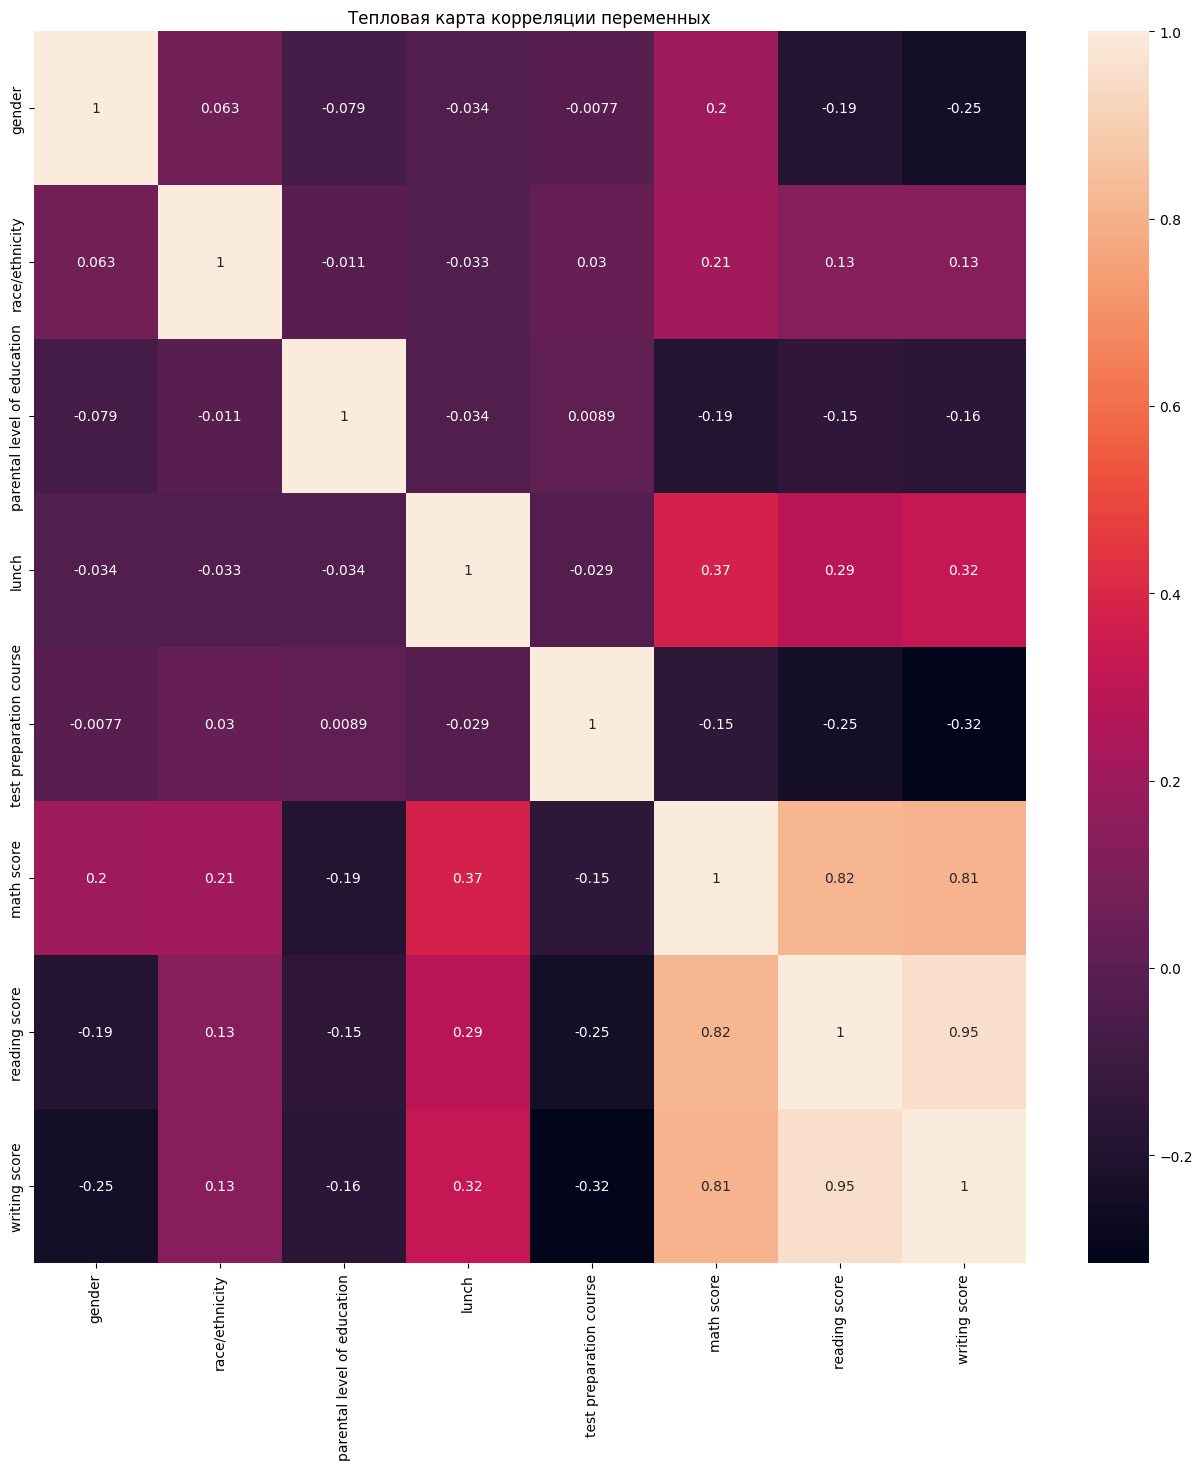

In [59]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True)
plt.title('Тепловая карта корреляции переменных')
plt.show()

In [60]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


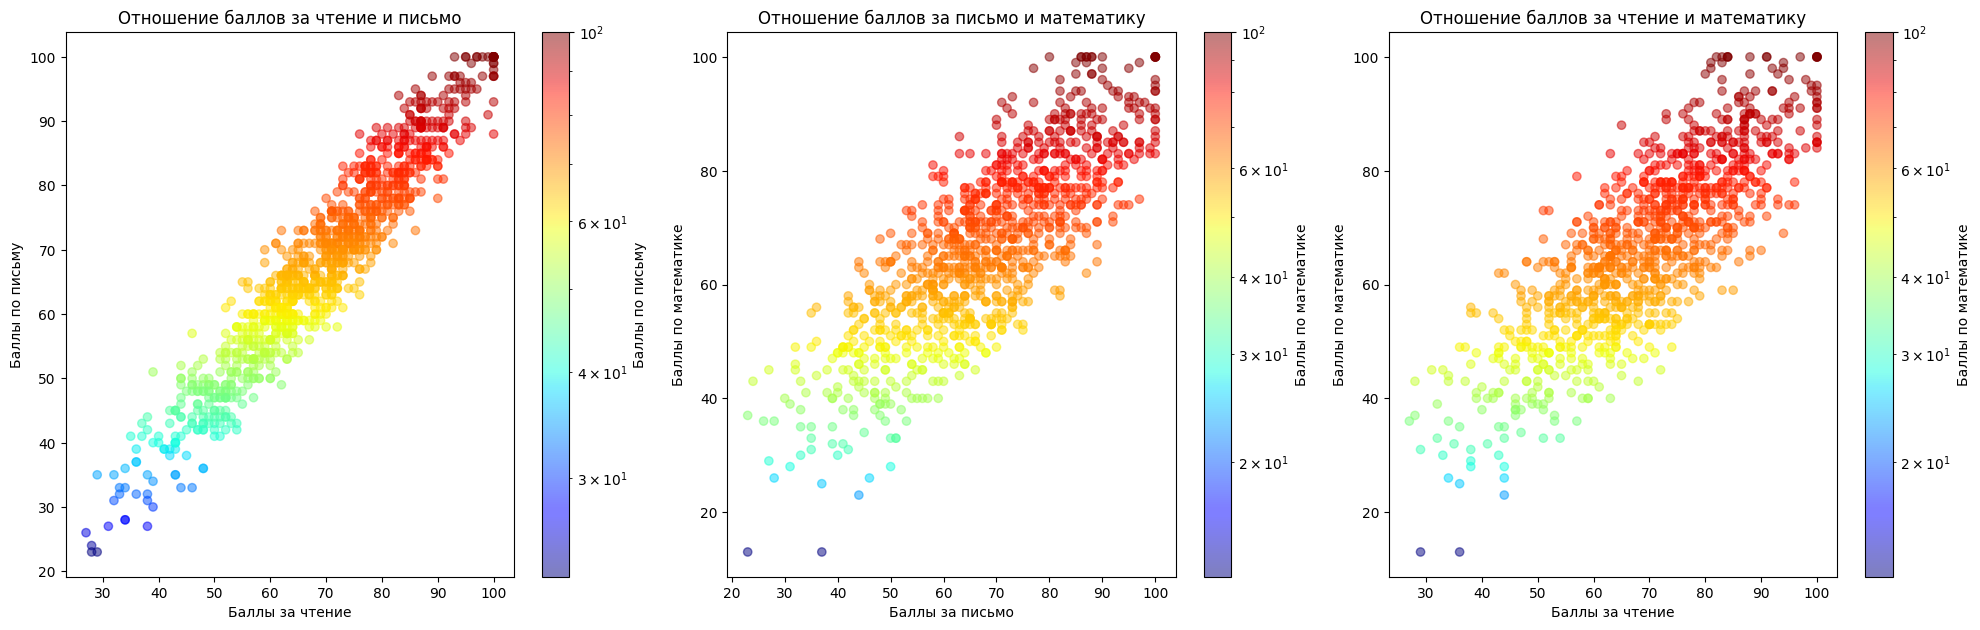

In [79]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.scatter(data['reading score'], data['writing score'], c=data['writing score'], cmap='jet', norm=mcolors.LogNorm(), alpha=0.5)
plt.colorbar(label='Баллы по письму')
plt.xlabel('Баллы за чтение')
plt.ylabel('Баллы по письму')
plt.title('Отношение баллов за чтение и письмо')

plt.subplot(2, 3, 2)
plt.scatter(data['writing score'], data['math score'], c=data['math score'], cmap='jet', norm=mcolors.LogNorm(), alpha=0.5)
plt.colorbar(label='Баллы по математике')
plt.xlabel('Баллы за письмо')
plt.ylabel('Баллы по математике')
plt.title('Отношение баллов за письмо и математику')

plt.subplot(2, 3, 3)
plt.scatter(data['reading score'], data['math score'], c=data['math score'], cmap='jet', norm=mcolors.LogNorm(), alpha=0.5)
plt.colorbar(label='Баллы по математике')
plt.xlabel('Баллы за чтение')
plt.ylabel('Баллы по математике')
plt.title('Отношение баллов за чтение и математику')

plt.tight_layout()
plt.show()